In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


print(tf.__version__)

2.11.0


In [4]:
#loading Data : We will use Fashion MNIST from Tensorflow

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [28]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [20]:
train_images.shape

(60000, 28, 28)

In [21]:
len(train_labels)


60000

In [22]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [23]:
test_images.shape

(10000, 28, 28)

In [24]:
len(test_labels)

10000

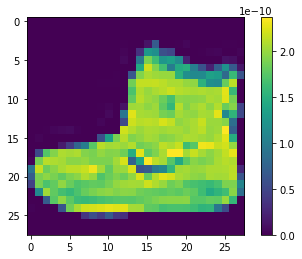

In [25]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [26]:
#Standerdize the Images by dividing by 255
train_images = train_images / 255.0

test_images = test_images / 255.0



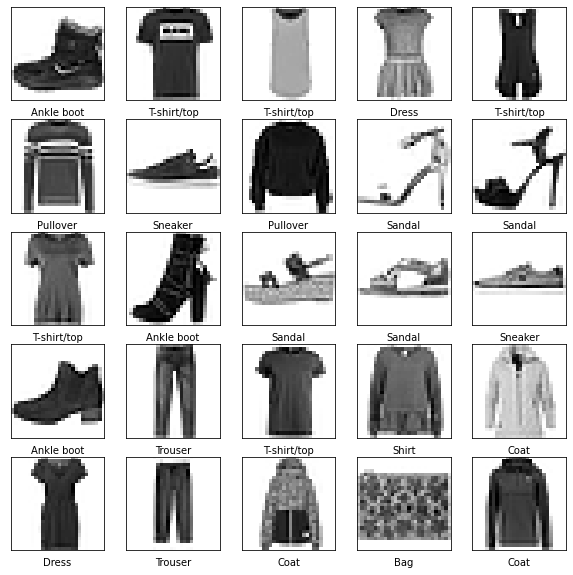

In [29]:
#Plot Gird of Images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [33]:
#Setting Up Tensorflow Model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [34]:
#Compile Model With Loss Function and Optimizer
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [35]:
#Train Model
model.fit(train_images,train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3028 - accuracy: 0.0978
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0995
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3027 - accuracy: 0.1004
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3028 - accuracy: 0.0978
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0993
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3028 - accuracy: 0.0974
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3028 - accuracy: 0.1003
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0983
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3028 - accuracy: 0.0991
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3

In [37]:
#Accruracy and Loss 
test_loss , test_acc =  model.evaluate(test_images,test_labels, verbose=2)
print("\nTest Accuracy:",test_acc)

313/313 - 1s - loss: 2.3026 - accuracy: 0.1000 - 597ms/epoch - 2ms/step

Test Accuracy: 0.10000000149011612


In [38]:
#Making Predictions- Adding Softmax layer to layer to convert the model's linear outputs—logits—to probabilities
porbability_model =  tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [54]:
predictions = porbability_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [40]:
predictions[0]

array([0.09998216, 0.10068028, 0.10014558, 0.0996206 , 0.10097186,
       0.09897625, 0.0995829 , 0.09963845, 0.10081529, 0.09958662],
      dtype=float32)

In [42]:
np.argmax(predictions[0])

4

In [43]:
test_labels[0]

9

In [55]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

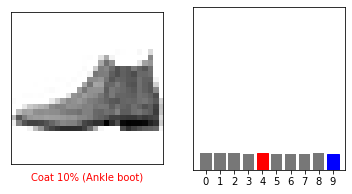

In [56]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


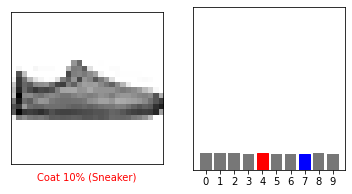

In [57]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

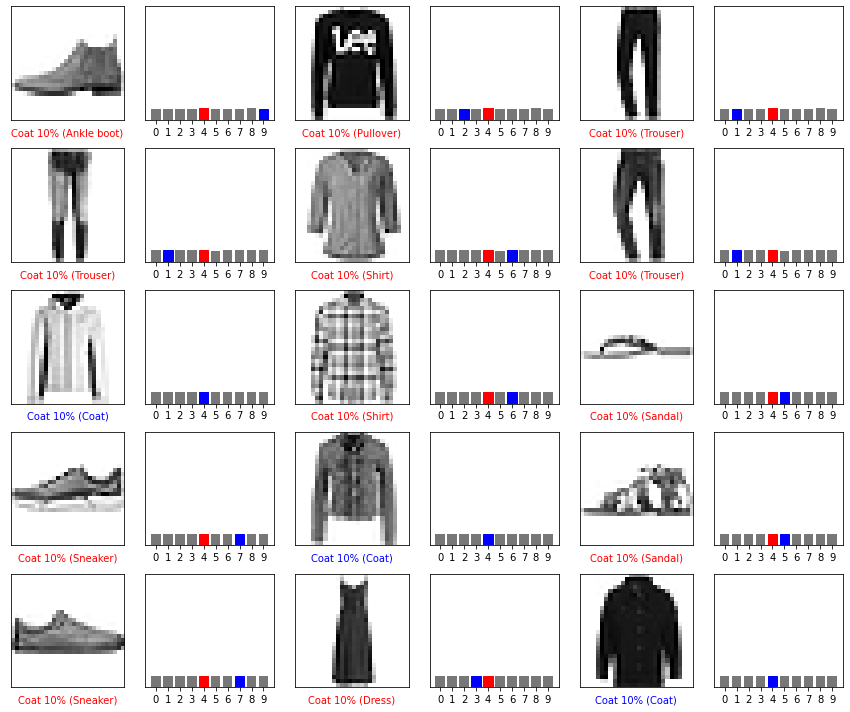

In [58]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [59]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [60]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [63]:
predictions_single = porbability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 23ms/step
[[0.09998216 0.10068028 0.10014558 0.0996206  0.10097186 0.09897625
  0.0995829  0.09963845 0.10081529 0.09958663]]


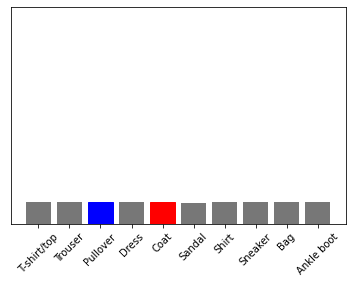

In [64]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [65]:
np.argmax(predictions_single[0])

4